# Movie Genre Data Analysis

## Introduction
In this project, I will mainly focus on the genre of movies in the dataset. I will try to explore and see what can be said about genres. Here are some questions that I will investigate:

### Research Questions:

1. Which genres are the most common (in terms of the number of produced movies)?
2. Which genres rank top in terms of investement and return?
3. Which genres rank top in terms of ticket sales?
4. Which genres rank top in terms of high ratings (voting avgerage above 8)?

### Research Hypotheses:

1. The best movies according to the rating votes return high profits.
2. The top movies in terms of ticket sales return high profits.
3. The movies with the biggest budgets tend to generate high revenue and profit.
4. The movies with the biggest budgets tend to rank high on popularity.

In [2]:
import pandas as pd
movies = pd.read_csv(r'/Users/zak/Repos/Portfolio-DataProjects/movies performance - Python/imdb_movies.csv')
# movies

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [5]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


By looking to the data, one can make the following remarks:

1. We have a 'id' which should stand for a unique id for each movie
2. The 'imdb_id' is also a unique id for each movie. This id can be usefull if we have other data sources from the same webside (imdb.com).
3. I am not sure how to read the values in the 'popularity' column. The value of 32 recorded for 'Jurassic World' seems to be on the high end
4. The budget and revenue seem to be in USD. For example, Jurassic World had a budget of $150 million USD and made ~$1.5 Billion USD in revenue.
5. Columns like 'keywords' and 'overview' might be less usefull for the analysis. Might drop them from the dataset.
6. The values in the 'runtime' column is in minues. 
7. The 'genres' column has several values separated by '|'. This will have to be reformated.
8. The 'budget_adj' and 'revenue_adj' have values stored using the scientific notation. This is different that the notation used in the 'budget' and 'revenue' columns.
    - By looking at movie.info(), one can see that the values in the 'budget' and 'revenue' columns are stored as integers, while the values in the 'budget_adj' and 'revenue_adj' columns are stored as floats. 
    - Might need to chage the datatypes at a latter stage of this study.

* First, I will proceed with a quick cleaning of this dataset. 
    - I want to reformat the 'genres' column into a more usable shap.
    - Check for duplicates.
    - In general, I need to reshap the data to ease answering the 'Research Questions' ennumerated above.



In [6]:
movies[movies.duplicated()].sum()

id                                                                  42194
imdb_id                                                         tt0411951
popularity                                                        0.59643
budget                                                           30000000
revenue                                                            967000
original_title                                                     TEKKEN
cast                    Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...
homepage                                                                0
director                                                 Dwight H. Little
tagline                                               Survival is no game
keywords                martial arts|dystopia|based on video game|mart...
overview                In the year of 2039, after World Wars destroy ...
runtime                                                                92
genres                        Crime|Dr

In [7]:
# This is the row that is duplicated
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Drppping the duplicate item

movies.drop_duplicates(inplace = True)

In [9]:
# Sanity check: see if the duplicate row has been deleted properly. The line below should return an empty table.

movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [10]:
# I need to fix the format of the 'genres' column.
#  By looking at the info() again, one can see that columns like 'id' and 'original_title' have 10865 non-null values.
# On the other hand, the 'genres' collumn has onnly 10842 non-null values.
# This means that there are 23 rows in the table that do not have 'genres' values.

movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

In [11]:
# Dropping the raws that have null values in the 'genres' column.
movies.dropna(subset = ['genres'], inplace = True)

In [12]:
# Sanity check: see if the targeted rows have been deleted properly, i.e. see if the 'Non-Null Count' is the same for 'id' and 'genres' columns.
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [13]:
# Here I will append a column to the table by calculating the profit.
# profit should be calculated by subtracting the budget from the revenue.

movies['profit'] = movies['revenue'] - movies['budget']

In [14]:
# Sanity check: see if the column 'profit' was added to the table.
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [15]:
# Now, I want to delete information that will not be useful for my analysis.
# Columns like 'cast', 'homepage', and 'overview' will be dropped.
# It will be faster if I select the columns that I want to keep than the other way around.
# The adjested values of the budget and revenue do not serve my analysis because the performance of any movie should be looked at the time of release. 
# So taking the impact of inflation will not add more value to the analysis.

movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [16]:
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   profit          10842 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 931.7+ KB


In [17]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [18]:
from pandas import Series, DataFrame

In [ ]:
# The code below will take the strings that are the values of the 'genres' column and split them into shorter strings using the '|' to split the big string.
# Each smaller string will be used in a seperate row. For instance, if the genres has the value: 'Action|Adventure|Science Fiction|Thriller', the code will split the big string
# into 4 small strings 'Action','Adventure','Science Fiction','Thriller'. Then 4 copies of the original string will be created and each copy will have one small string in the 'genre_split' column.

In [19]:
split  = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

/var/folders/c5/09trk0mj389dhs59ptvs9f8h0000gn/T/ipykernel_16743/3501350645.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split  = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


In [20]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


### Research Questions:

1. Which genres are the most common (in terms of the number of produced movies)?

In [24]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = False)

In [25]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

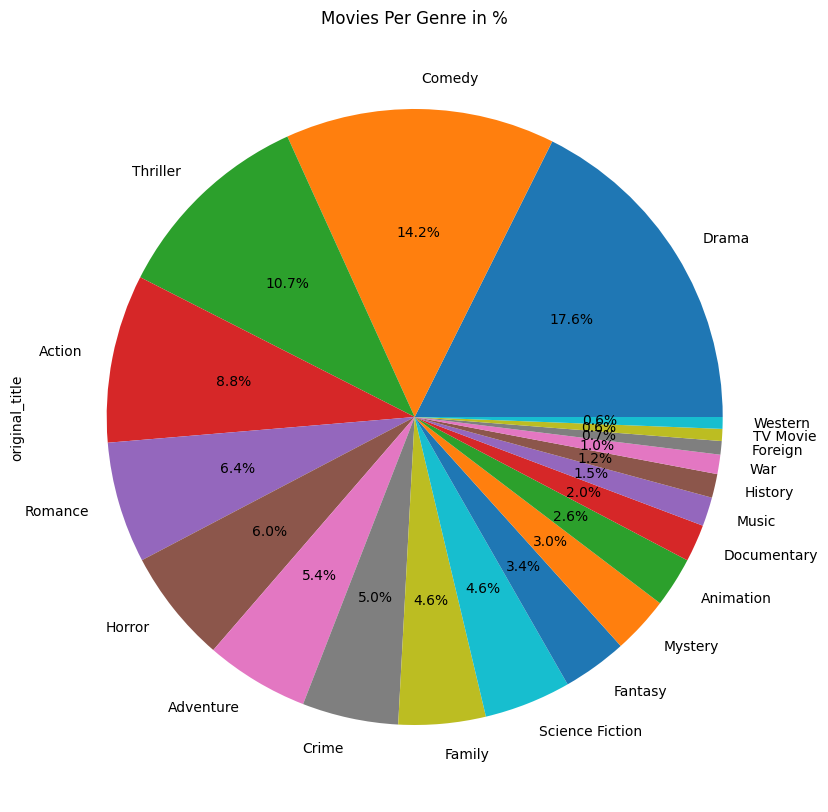

In [26]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

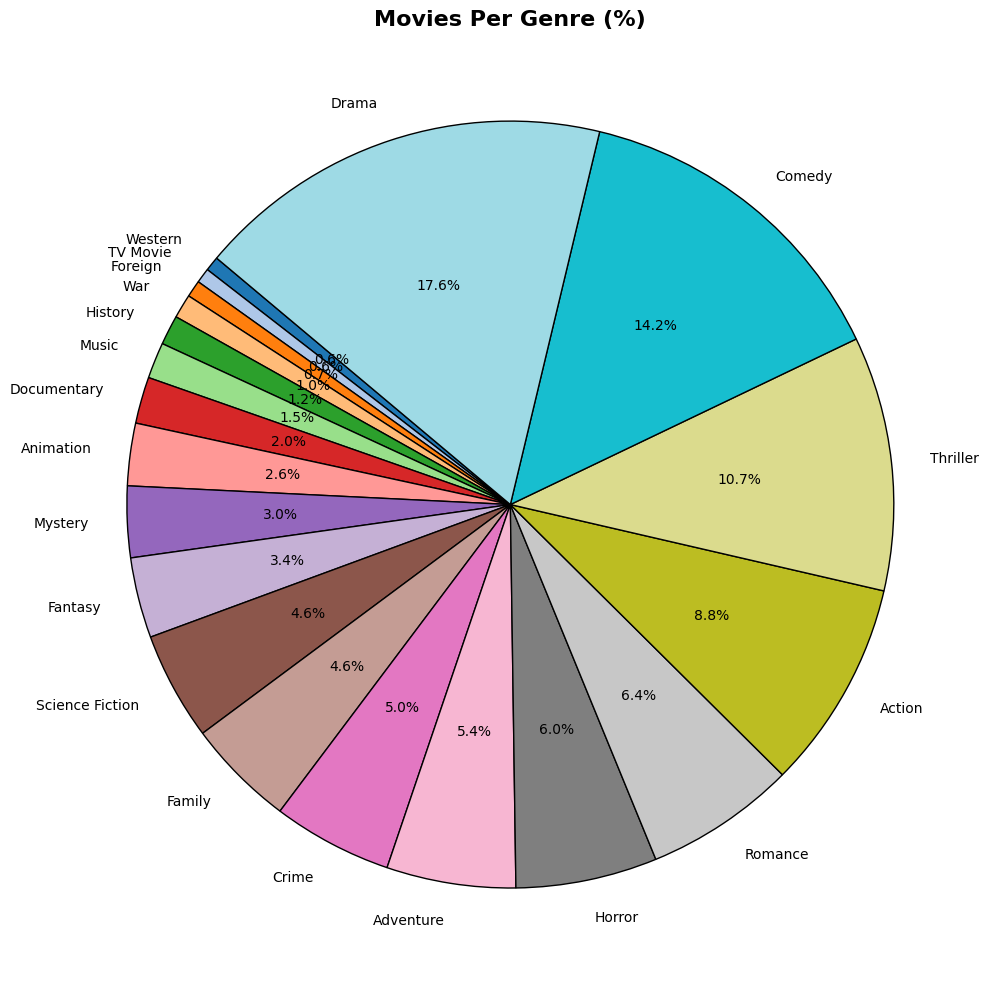

In [84]:
# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    genres_count['original_title'],
    labels=genres_count.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,  # Distinct colors for up to 20 categories
    wedgeprops={'edgecolor': 'black'}
)

# Add title
ax.set_title('Movies Per Genre (%)', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures the pie is a circle
ax.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


In [28]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = True)

<Axes: title={'center': 'Moviees Per Genre'}, ylabel='genres_split'>

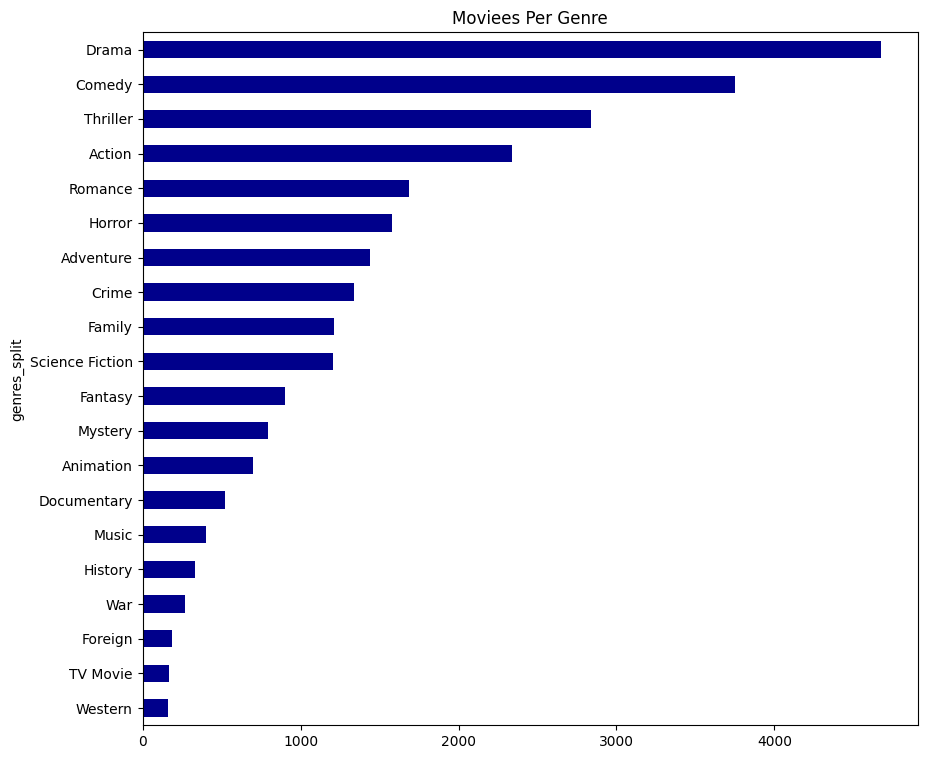

In [29]:
genres_count['original_title'].plot.barh(title = 'Moviees Per Genre', color = 'DarkBlue', figsize = (10,9))

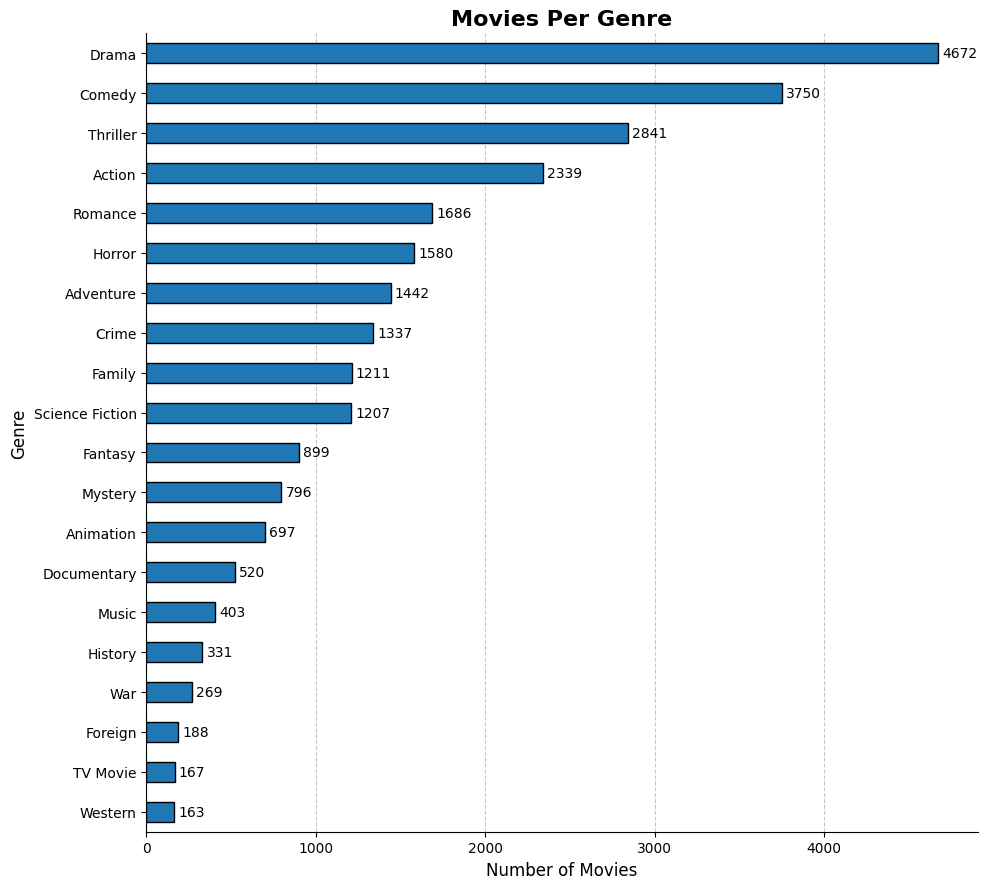

In [85]:
# Plot bar chart
ax = genres_count['original_title'].plot.barh(
    figsize=(10, 9),
    color='#1f77b4',
    edgecolor='black'
)

# Add title and axis labels
ax.set_title('Movies Per Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Movies', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add bar labels (counts)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Layout adjustment
plt.tight_layout()
plt.show()


2. Which genres rank top in terms of investement and return?

In [30]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


In [31]:
genres_avg = movies_genre.groupby('genres_split').mean('budget', 'revenue')
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

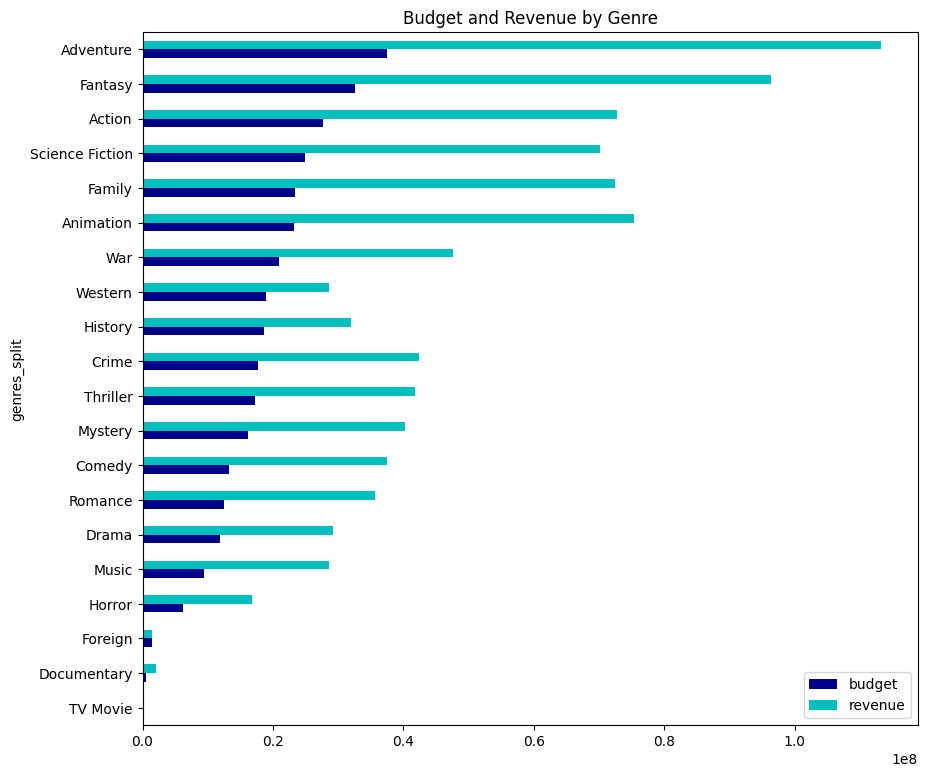

In [97]:
genres_avg.sort_values('budget',ascending = True, inplace = True)
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

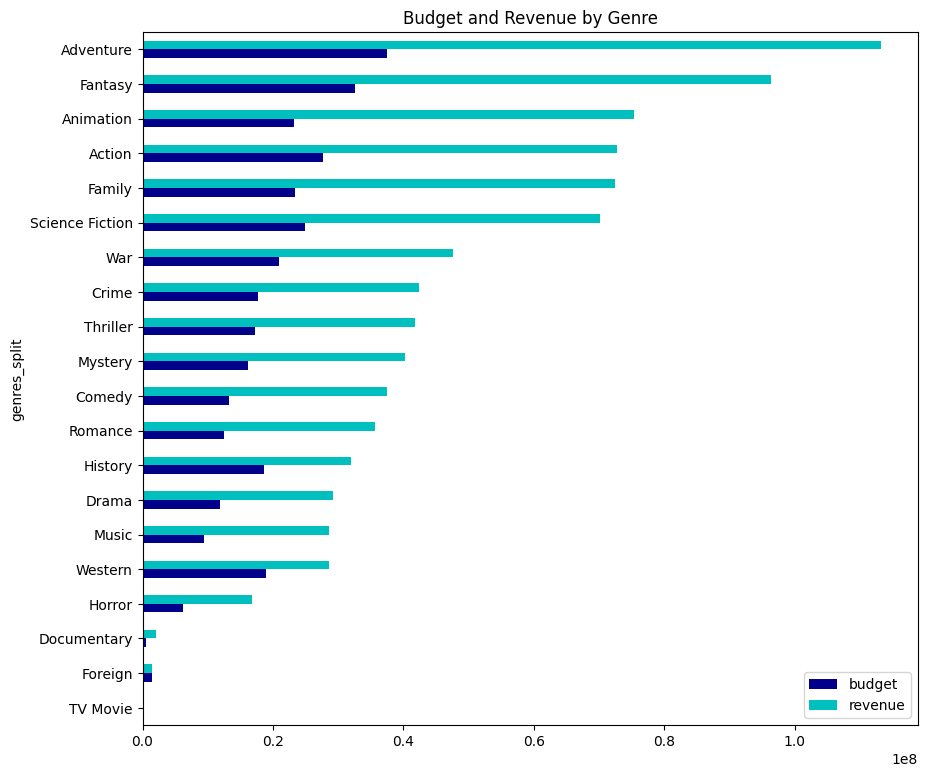

In [ ]:
genres_avg.sort_values('revenue',ascending = True, inplace = True)
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

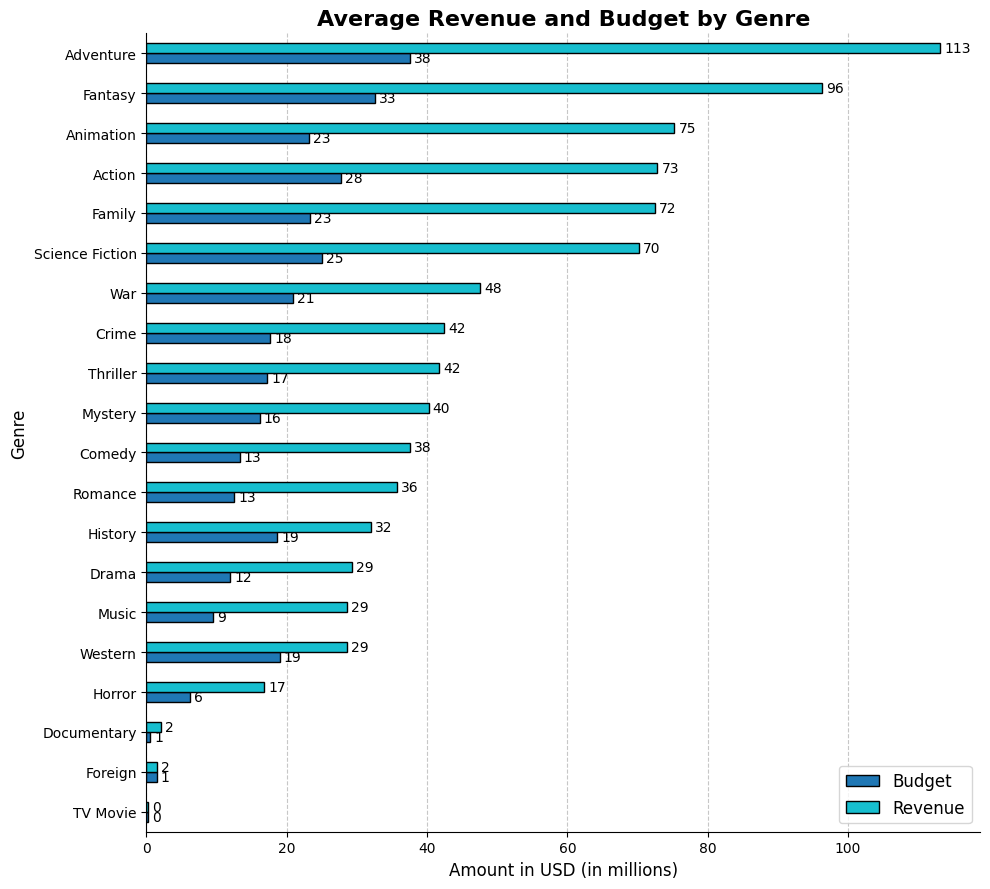

In [39]:
import matplotlib.pyplot as plt

# Convert to millions
genres_avg_millions = genres_avg.copy()
genres_avg_millions[['budget', 'revenue']] /= 1_000_000

# Sort values and create the plot
genres_avg_millions.sort_values('revenue', ascending=True, inplace=True)
ax = genres_avg_millions[['budget', 'revenue']].plot.barh(
    color=['#1f77b4', '#17becf'],  # More appealing colors
    figsize=(10, 9),
    edgecolor='black'
)

# Add a title and labels
ax.set_title('Average Revenue and Budget by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Amount in USD (in millions)', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Improve layout and remove top/right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add gridlines for easier comparison
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Make the legend clearer
ax.legend(['Budget', 'Revenue'], fontsize=12, loc='lower right')

# Annotate each bar with values (optional but nice)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

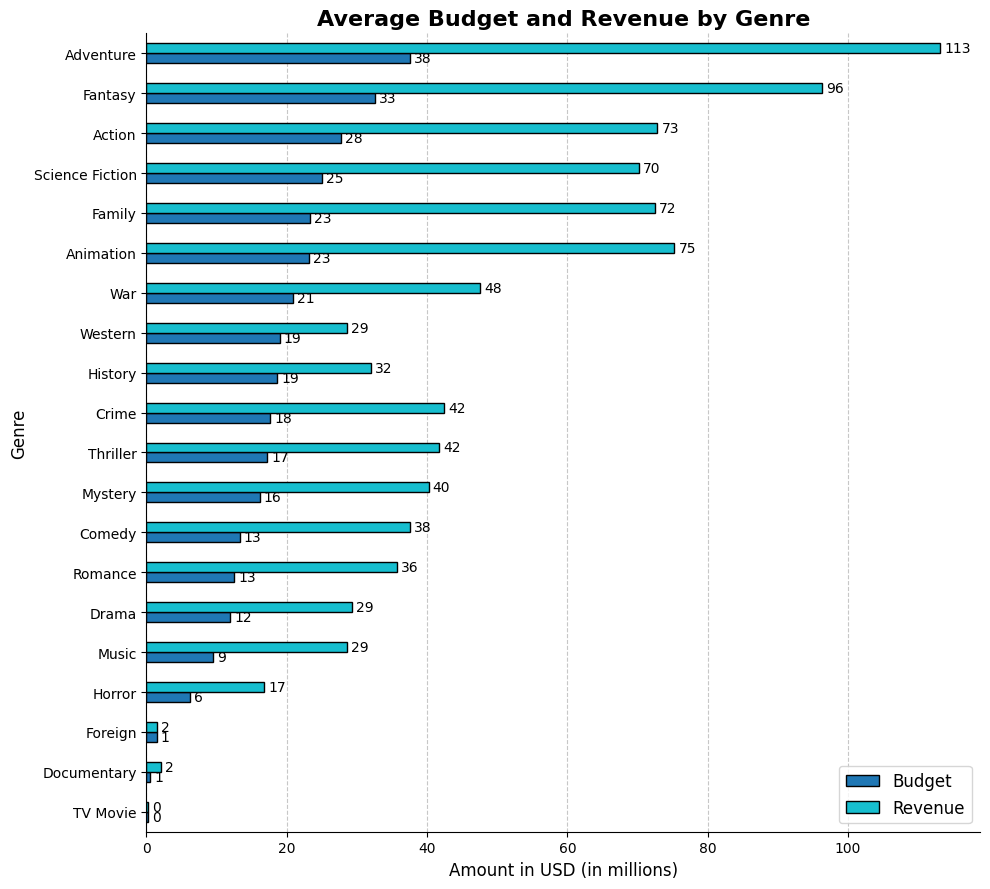

In [40]:
# Convert to millions
genres_avg_millions = genres_avg.copy()
genres_avg_millions[['budget', 'revenue']] /= 1_000_000

# Sort values and create the plot
genres_avg_millions.sort_values('budget', ascending=True, inplace=True)
ax = genres_avg_millions[['budget', 'revenue']].plot.barh(
    color=['#1f77b4', '#17becf'],  # More appealing colors
    figsize=(10, 9),
    edgecolor='black'
)

# Add a title and labels
ax.set_title('Average Budget and Revenue by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Amount in USD (in millions)', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Improve layout and remove top/right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add gridlines for easier comparison
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Make the legend clearer
ax.legend(['Budget', 'Revenue'], fontsize=12, loc='lower right')

# Annotate each bar with values (optional but nice)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


##### Q: Which genres have high average profit?
A: the plot blow suggests that Adventure and Fantasy movies are the most profitable.

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

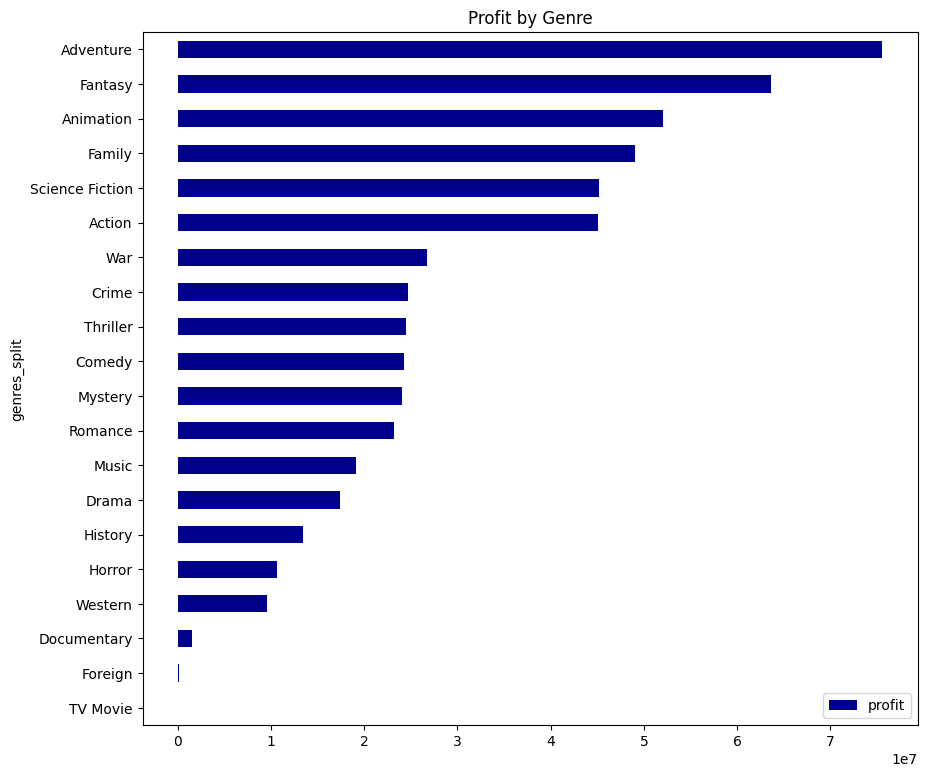

In [100]:
genres_avg.sort_values('profit',ascending = True, inplace = True)
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = 'DarkBlue', figsize = (10,9))

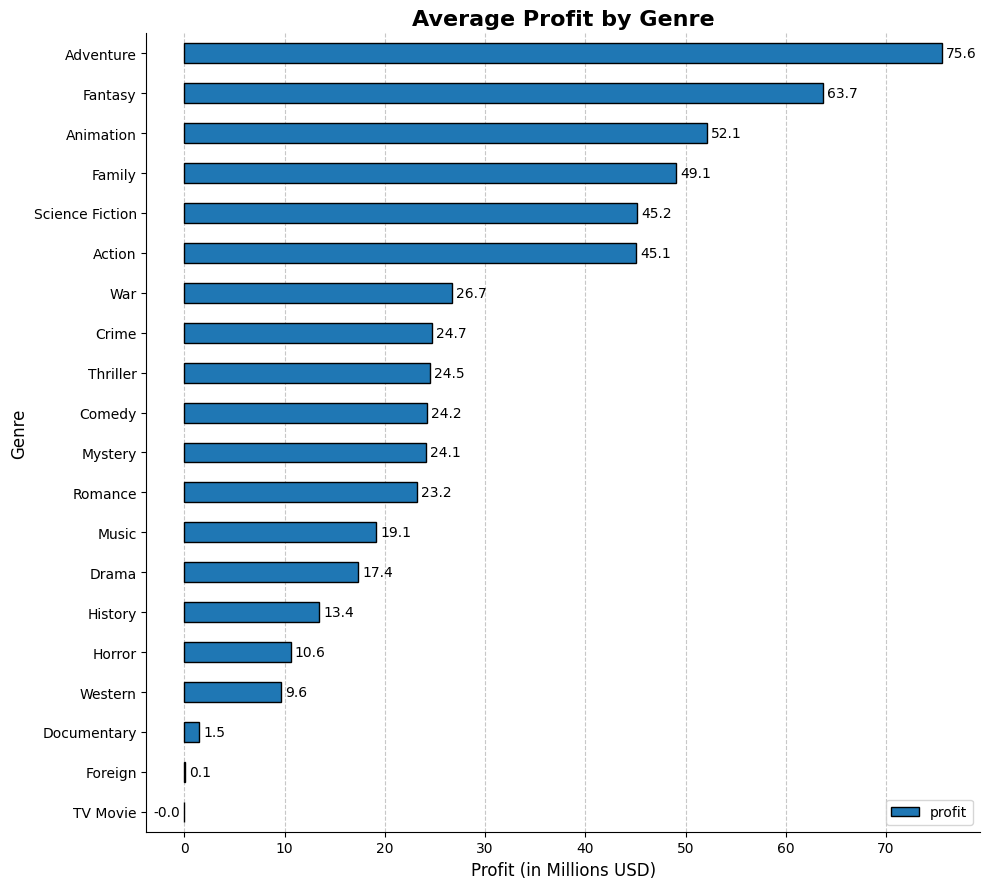

In [ ]:
# Convert to millions
genres_avg_millions['profit'] /= 1_000_000

# Sort values and create the plot
genres_avg_millions.sort_values('profit', ascending=True, inplace=True)
ax = genres_avg_millions[['profit']].plot.barh(
    color='#1f77b4',  # Better blue tone
    figsize=(10, 9),
    edgecolor='black'
)

# Add a title and labels
ax.set_title('Average Profit by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Profit (in Millions USD)', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Remove spines and add gridlines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



##### Q: Which genres rank top in terms of popularity?

A: The plot below suggests that Adventure and Science Fiction are the most popular genres

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

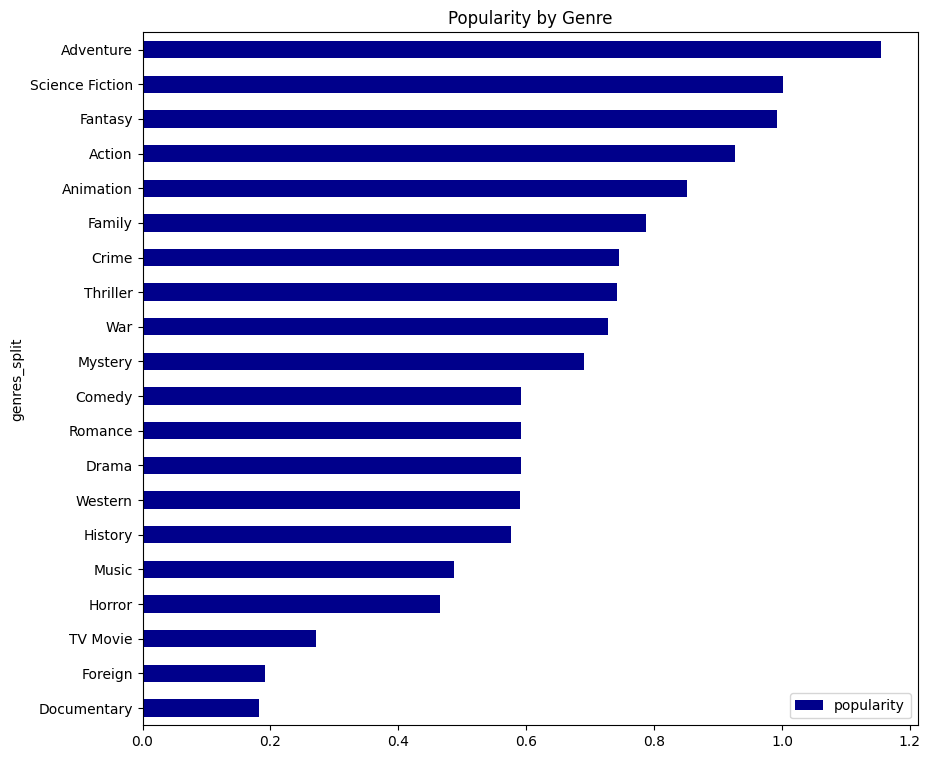

In [101]:
genres_avg.sort_values('popularity',ascending = True, inplace = True)
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue', figsize = (10,9))

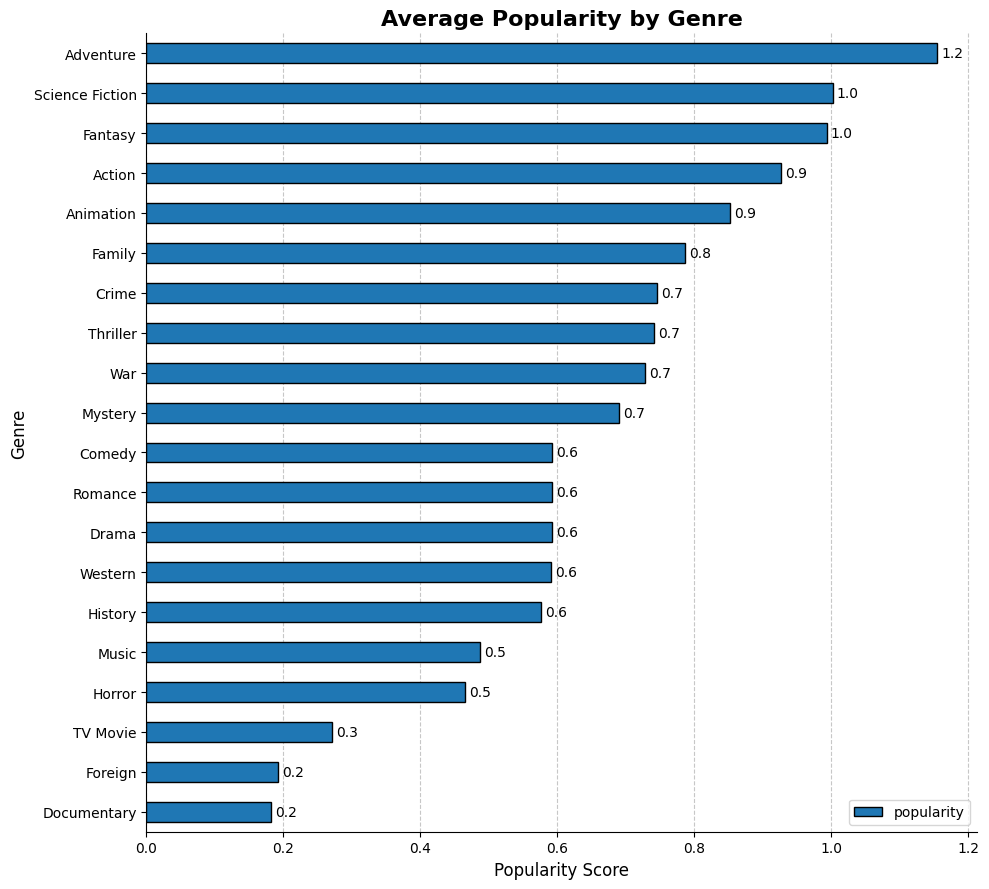

In [42]:
# Sort values and create the plot
genres_avg_sorted = genres_avg.sort_values('popularity', ascending=True)
ax = genres_avg_sorted[['popularity']].plot.barh(
    color='#1f77b4',  # Cleaner blue
    figsize=(10, 9),
    edgecolor='black'
)

# Add a title and axis labels
ax.set_title('Average Popularity by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Popularity Score', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Remove spines and add gridlines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Annotate each bar with popularity values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



##### Q: Which genres rank top in terms of high ratings (voting avgerage above 8)?

A: The plots below show that the order in terms of average votes is different when the instances with less than 50 votes are filtered out. When the instances with less than 50 votes are filtered out, the ranking order makes more sense. One can see that the Documnetary, Crime and Adventure are the movie genres with the highest average ratings.

In [44]:
movies_genre # I want to look again at the table

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,0,Comedy


In [76]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [77]:
genre_vote_fifty = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.mean()).sort_values('vote_average',ascending = True)
genre_vote_zero = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.mean()).sort_values('vote_average',ascending = True)

In [78]:
genre_vote_fifty

,vote_average
genres_split,
Fantasy,8.000000
Science Fiction,8.000000
Animation,8.000000
Mystery,8.000000
Horror,8.000000
Family,8.000000
Romance,8.033333
Thriller,8.033333
Action,8.033333


In [79]:
genre_vote_zero

,vote_average
genres_split,
Family,8.000000
War,8.033333
History,8.050000
Action,8.050000
Animation,8.066667
Adventure,8.100000
Crime,8.116667
Drama,8.120000
Romance,8.120000


(7.9, 8.2)

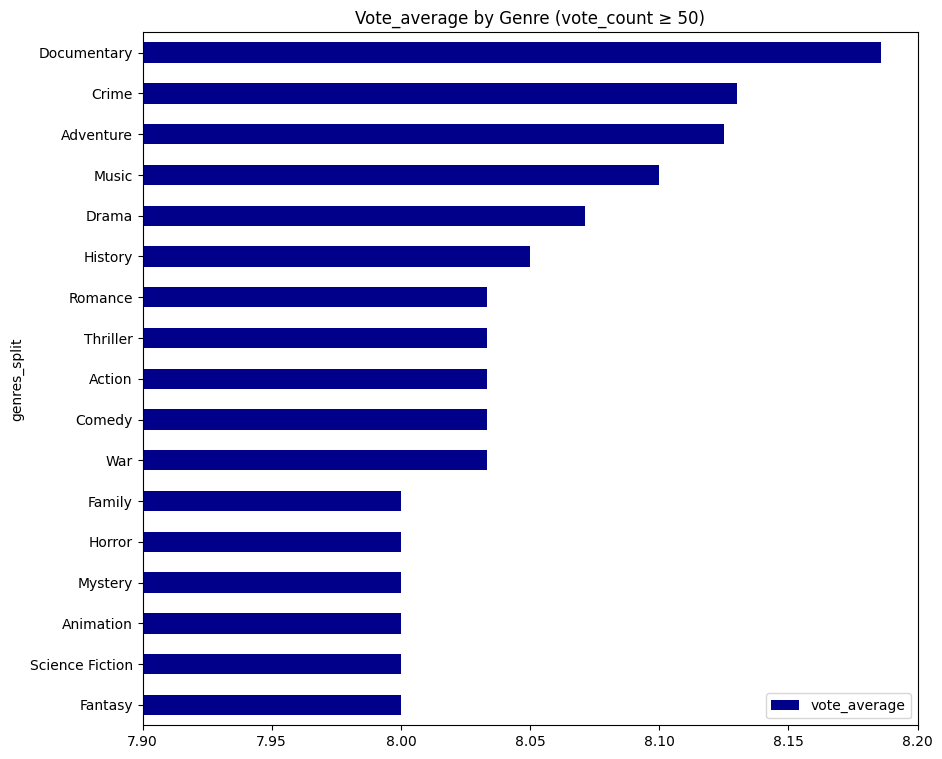

In [80]:
genre_vote_fifty.sort_values('vote_average',ascending = True, inplace = True)
genre_vote_fifty[['vote_average']].plot.barh(title = 'Vote_average by Genre (vote_count ≥ 50)', color = 'DarkBlue', figsize = (10,9)).set_xlim(7.9,8.2)

(7.9, 8.5)

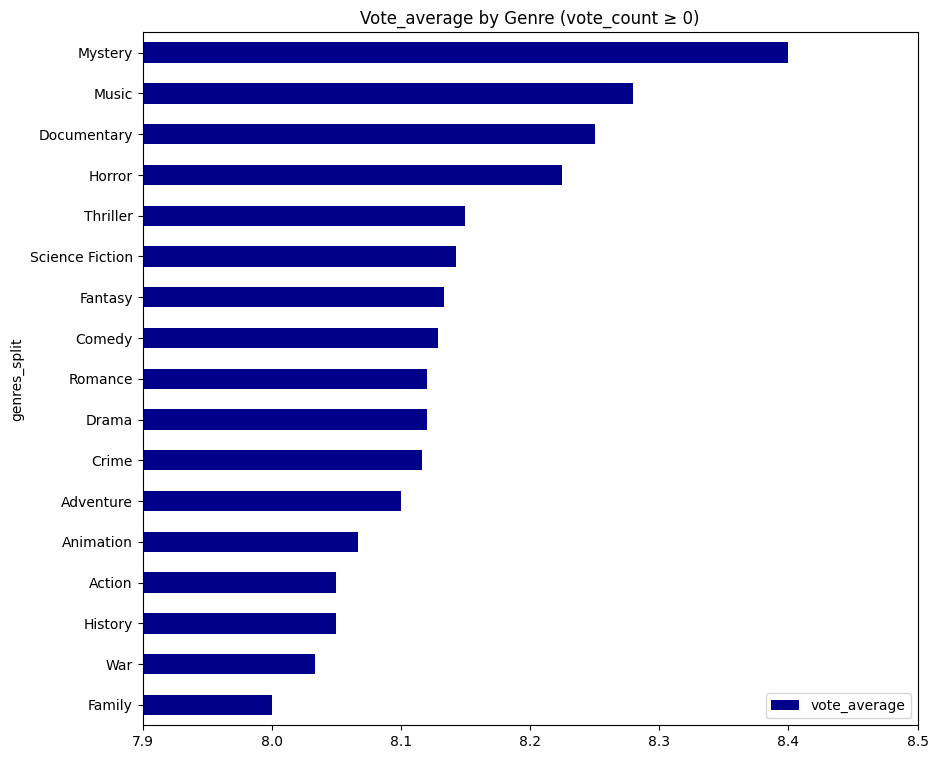

In [81]:
genre_vote_zero.sort_values('vote_average',ascending = True, inplace = True)
genre_vote_zero[['vote_average']].plot.barh(title = 'Vote_average by Genre (vote_count ≥ 0)', color = 'DarkBlue', figsize = (10,9)).set_xlim(7.9,8.5)

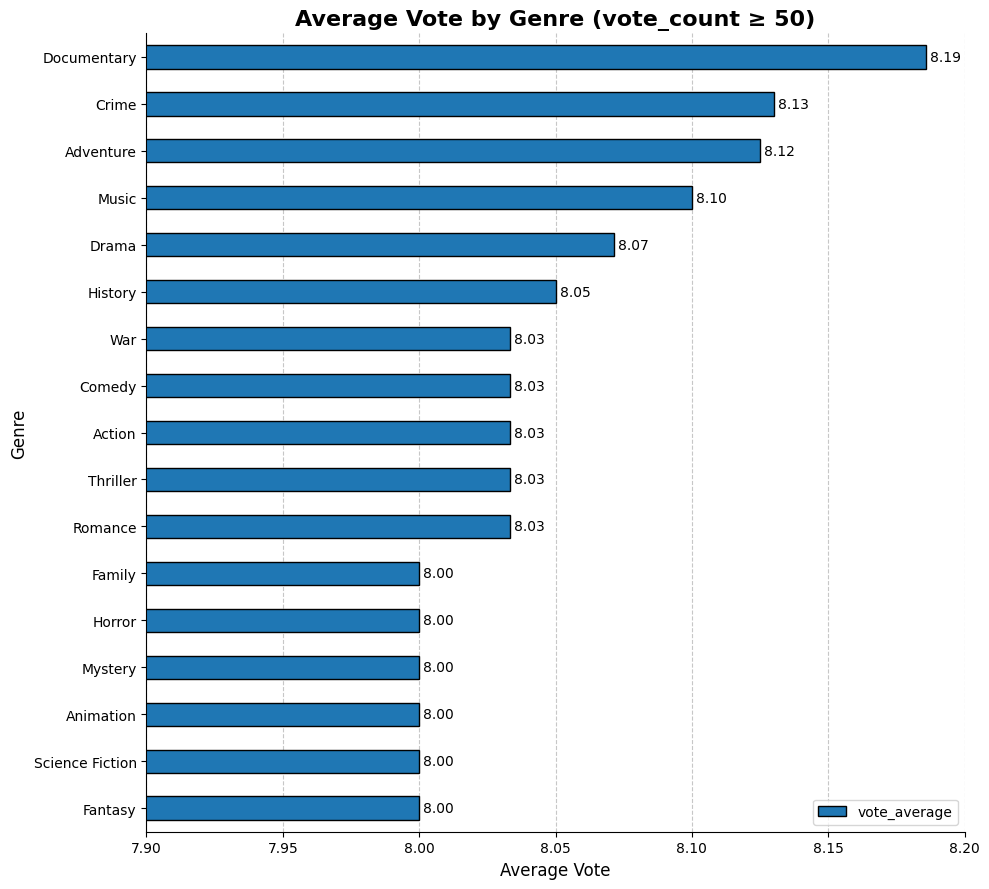

In [82]:
# CASE: instance with 'vote_count' < 50 will be excluded when generating the hbar chart.

# Sort values
genre_vote_fifty_sorted = genre_vote_fifty.sort_values('vote_average', ascending=True)

# Plot
ax = genre_vote_fifty_sorted[['vote_average']].plot.barh(
    color='#1f77b4',
    figsize=(10, 9),
    edgecolor='black'
)

# Set title and axis labels
ax.set_title('Average Vote by Genre (vote_count ≥ 50)', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Vote', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Set x-axis limit to zoom into the vote range
ax.set_xlim(7.9, 8.2)

# Clean up spines and add gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Annotate bars with vote averages
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Tight layout for clean spacing
plt.tight_layout()

# Show the plot
plt.show()


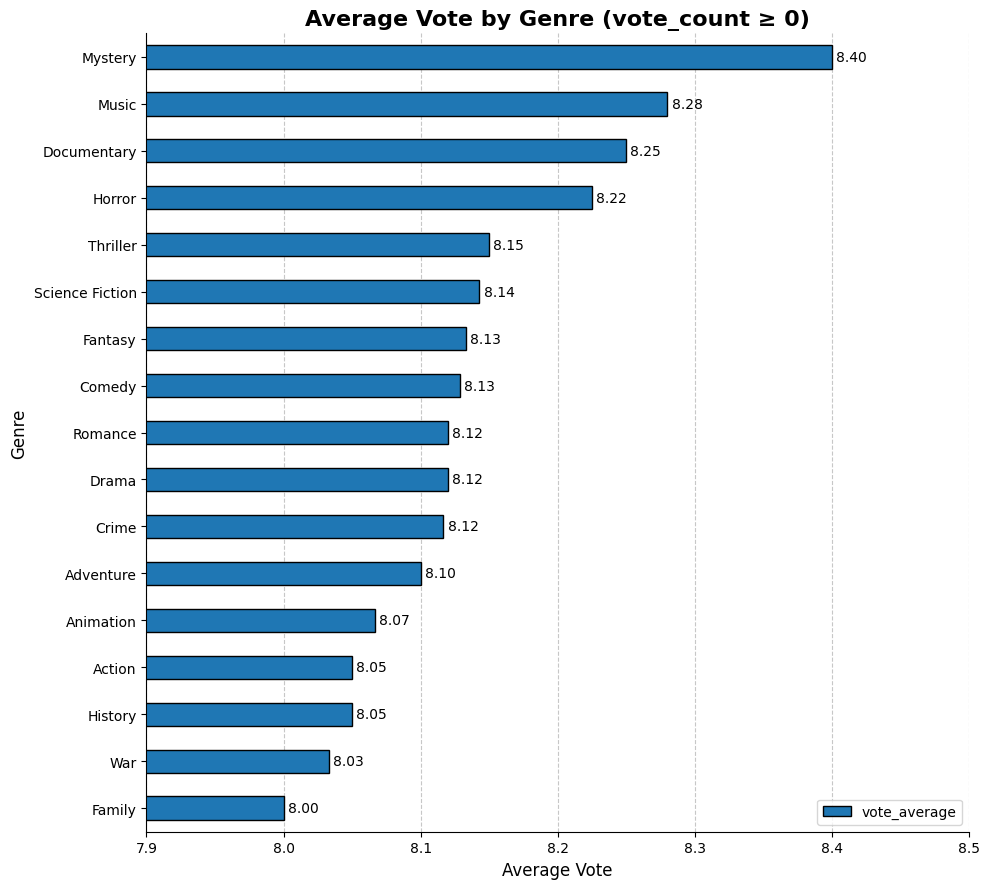

In [83]:
# CASE: no excluded instance, i.e. 'vote_count' can have any values.

# Sort values
genre_vote_zero_sorted = genre_vote_zero.sort_values('vote_average', ascending=True)

# Plot
ax = genre_vote_zero_sorted[['vote_average']].plot.barh(
    color='#1f77b4',
    figsize=(10, 9),
    edgecolor='black'
)

# Set title and labels
ax.set_title('Average Vote by Genre (vote_count ≥ 0)', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Vote', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# Set x-axis limits to zoom in
ax.set_xlim(7.9, 8.5)

# Clean up spines and add gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Annotate bars with vote averages
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


### Research Hypotheses:

1. The best movies according to the rating votes return high profits.

In [156]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [ ]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [168]:
movies_50p_votes = movies_genre[movies_genre['vote_count']>= 50]

In [176]:
del movies_50p_votes['release_date']

In [177]:
movies_50p_votes.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,124,5562,6.500000,1363528810
1,28.419936,150000000,378436354,120,6185,7.100000,228436354
2,13.112507,110000000,295238201,119,2480,6.300000,185238201
3,11.173104,200000000,2068178225,136,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,137,2947,7.300000,1316249360


In [179]:

movies_50p_votes.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

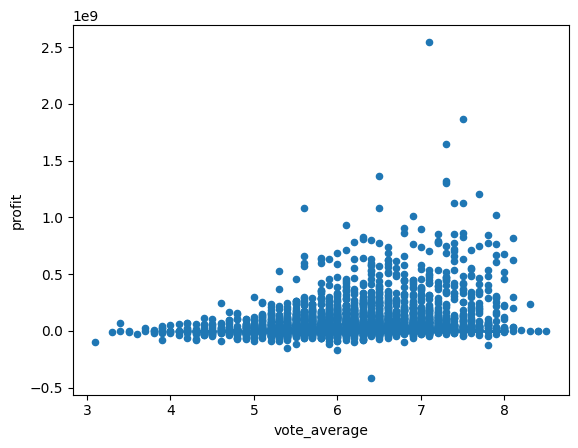

In [180]:
movies_50p_votes.plot.scatter(x = 'vote_average', y = 'profit')

<Axes: xlabel='vote_average', ylabel='profit'>

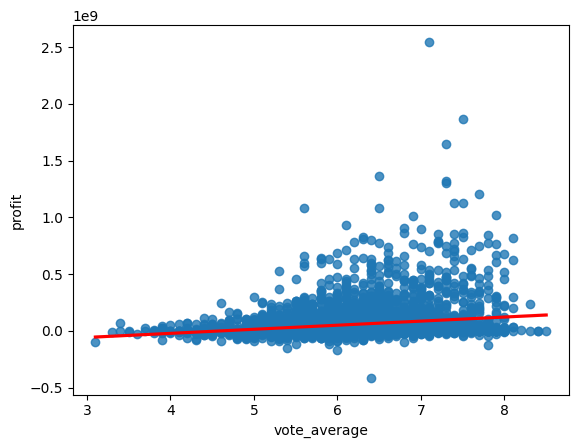

In [182]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'profit', data = movies_50p_votes, line_kws = {"color": 'red'})

One can se on the plots above, and also the table of correlations, that the average ratings has a weak yet positive correlation with the profit made by each movie. In the figure above, the trendline (depicted in red) show sligh increase in profits when the voting average increases.
It might be also useful to note that in the range above 6 for the vote average, the number of outliers is visibility more imported and that there is an upwards bias. In other words, there are more movies about the red trendline and below it. A deeper analysis will be needed to unravel non-trivial correlations. I am suspecting that multipartite correlations can provide more insights into the performance of movies.

<Axes: xlabel='vote_average', ylabel='revenue'>

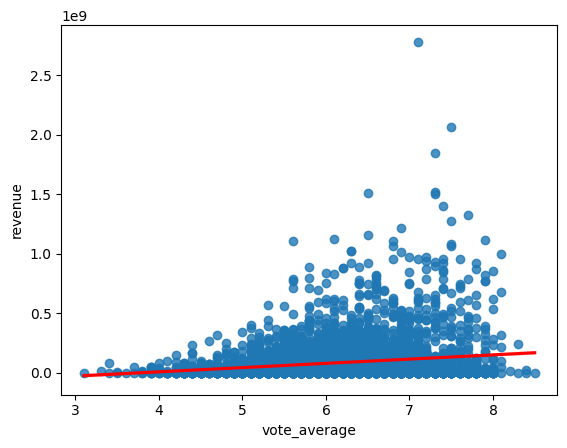

In [186]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_50p_votes, line_kws = {"color": 'red'})

2. The top movies in terms of ticket sales return high profits.

In [187]:
movies_50p_votes.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


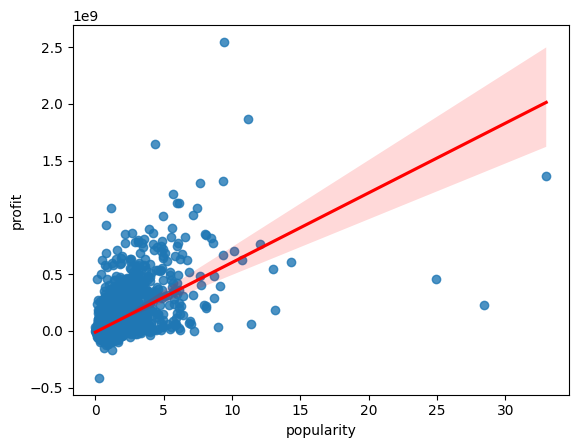

<Figure size 1000x900 with 0 Axes>

In [193]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'profit', data = movies_50p_votes, line_kws = {"color": 'red'})
plt.figure(figsize = (10,9))
plt.show()

Hypothesis: The movies with the biggest budgets tend to generate high revenue and profit.

Answer: Yes

In [194]:
movies_50p_votes.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,124,5562,6.500000,1363528810
1,28.419936,150000000,378436354,120,6185,7.100000,228436354
2,13.112507,110000000,295238201,119,2480,6.300000,185238201
3,11.173104,200000000,2068178225,136,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,137,2947,7.300000,1316249360


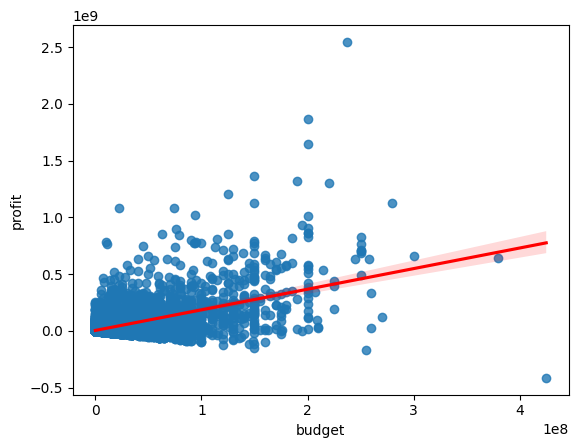

<Figure size 1000x900 with 0 Axes>

In [196]:
sns.regplot(x = 'budget', y = 'profit', data = movies_50p_votes, line_kws = {"color": 'red'})
plt.figure(figsize = (10,9))
plt.show()

Hypothesis: The movies with the biggest budgets tend to rank high on popularity.

Answer: Yes

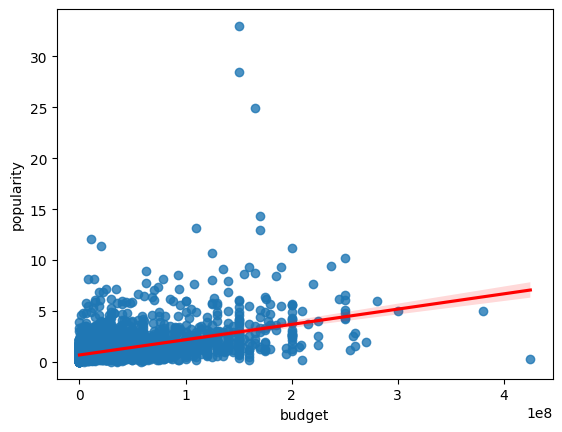

<Figure size 1000x900 with 0 Axes>

In [197]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_50p_votes, line_kws = {"color": 'red'})
plt.figure(figsize = (10,9))
plt.show()

Additional Hypothesis: ...
Answer: ...


In [201]:
movies_year = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]
split  = movies_year['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_year['genres']
movies_year = movies_year.join(split)
movies_year.head()

/var/folders/c5/09trk0mj389dhs59ptvs9f8h0000gn/T/ipykernel_26939/150092881.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split  = movies_year['genres'].str.split('|').apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


Now, I want to look at the profits, per genre, per year.

I will need to reshap the data and group by the year and the genre.

In [203]:
year_genre = pd.DataFrame(movies_year.groupby(['release_year','genres_split'])['profit'].mean())

In [207]:
final_genre = pd.pivot_table(year_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

Text(0.5, 1.0, 'Genres by Profit per Year')

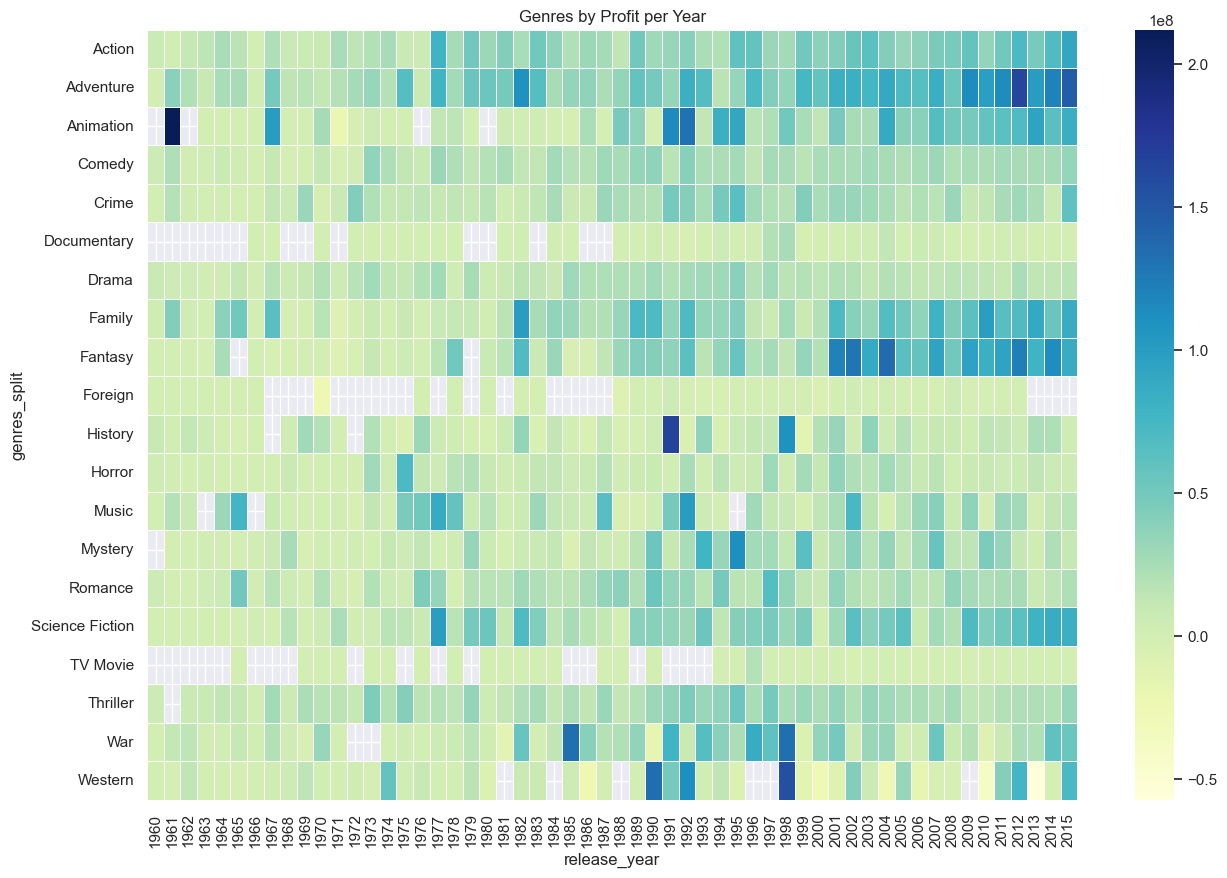

In [214]:
# Now, I want to generate a heatmap
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths=0.5)
plt.title('Genres by Profit per Year')

year_genre